In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

In [3]:
data= pd.read_csv("..\Data\TCS_stock_history.csv")
data.head()
                  

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [5]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')


In [7]:
data.fillna(method='ffill', inplace=True)

C:\Users\Madhav\AppData\Local\Temp\ipykernel_15248\2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [8]:
data.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


In [9]:
corr=data.corr()
corr

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


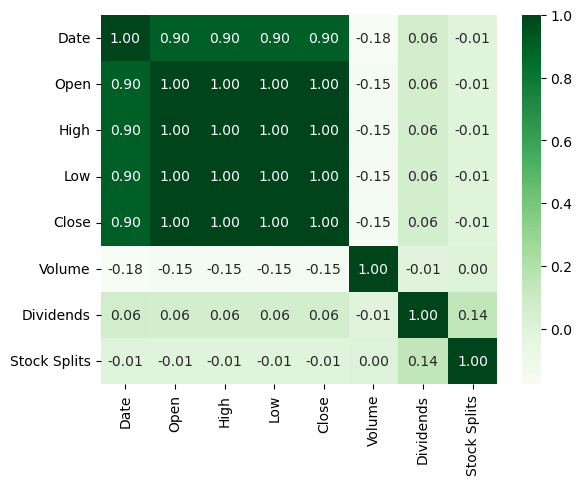

In [10]:
sns.heatmap(corr, annot=True,cmap="Greens",fmt='.2f')
plt.show()

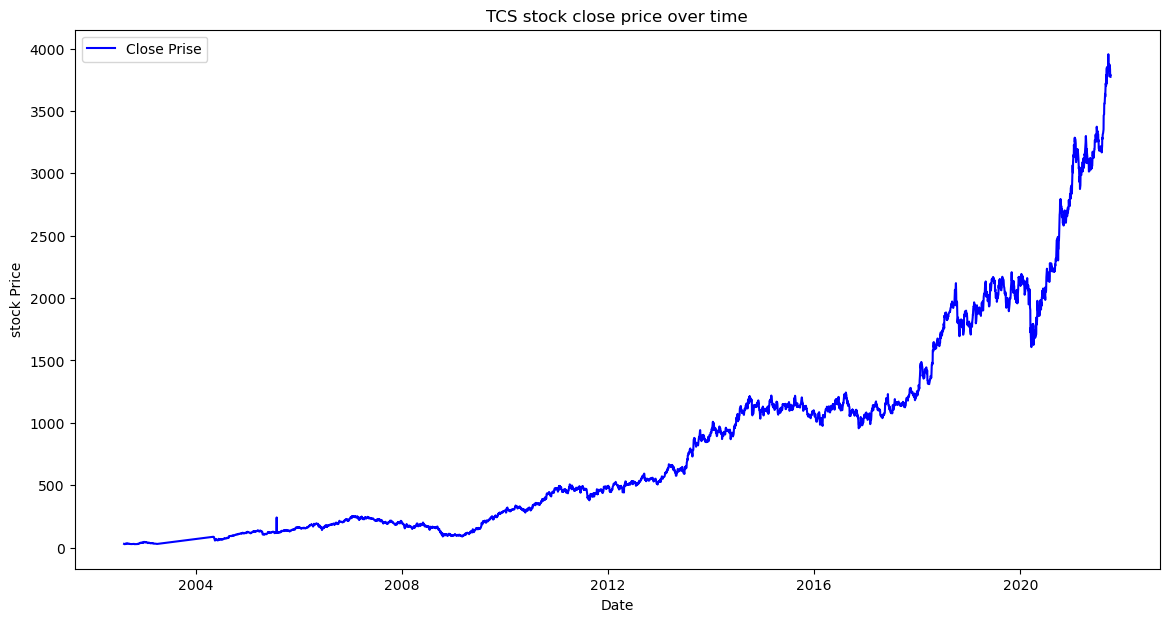

In [11]:
plt.figure(figsize=(14,7))
plt.plot(data['Date'],data['Close'],color='blue',label='Close Prise')
plt.xlabel('Date')
plt.ylabel("stock Price")
plt.title('TCS stock close price over time')
plt.legend()
plt.show()

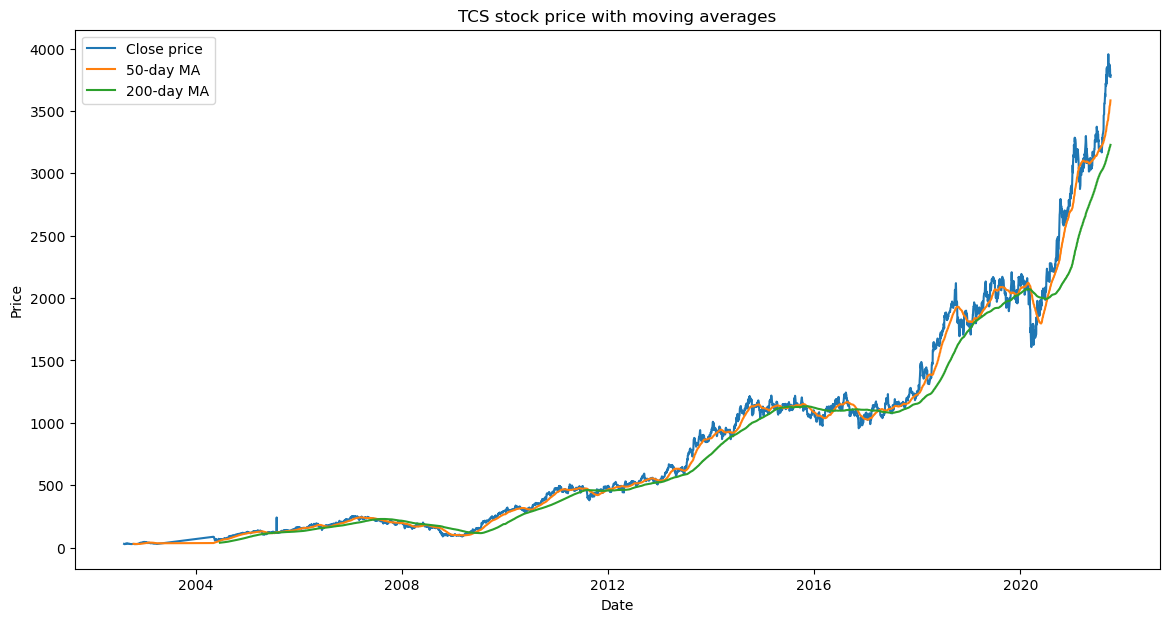

In [12]:
data['MA50']=data['Close'].rolling(window=50).mean()
data['MA200']=data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,7))
plt.plot(data["Date"],data['Close'],label='Close price')
plt.plot(data['Date'],data['MA50'],label='50-day MA')
plt.plot(data['Date'],data['MA200'],label='200-day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS stock price with moving averages')
plt.legend()
plt.show()

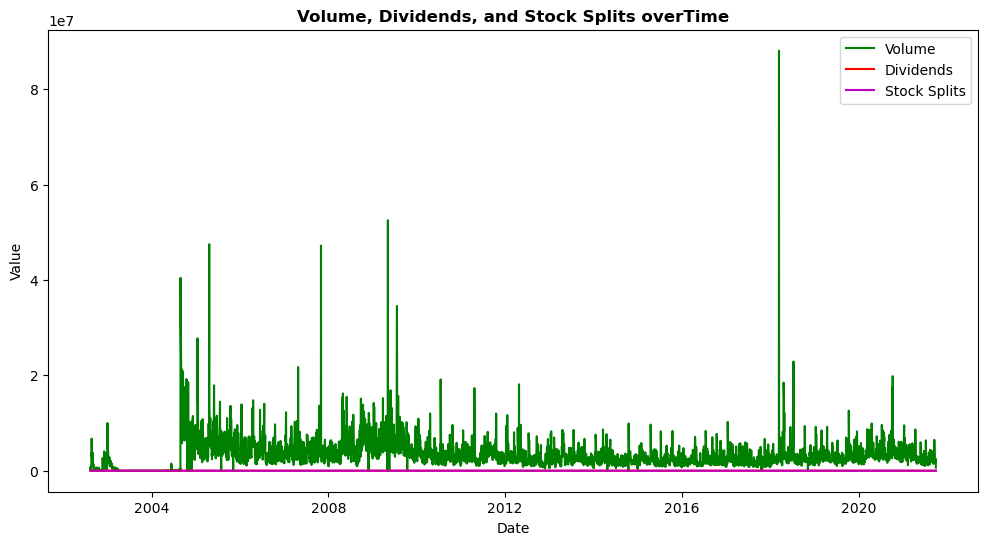

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='g')
plt.plot(data['Date'], data['Dividends'], label='Dividends',color='r')
plt.plot(data['Date'], data['Stock Splits'], label='Stock Splits',color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits overTime',weight = "bold")
plt.legend()
plt.show()

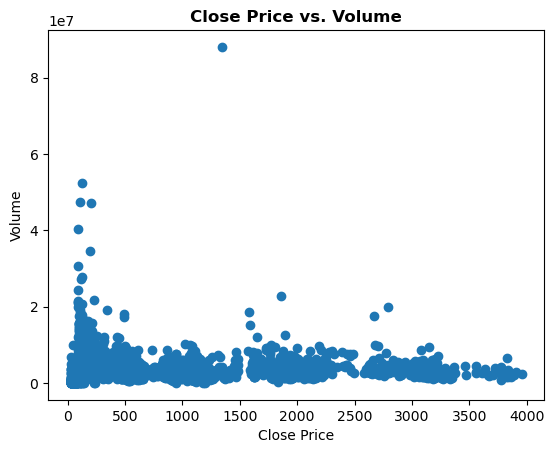

In [14]:
plt.scatter(data['Close'], data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

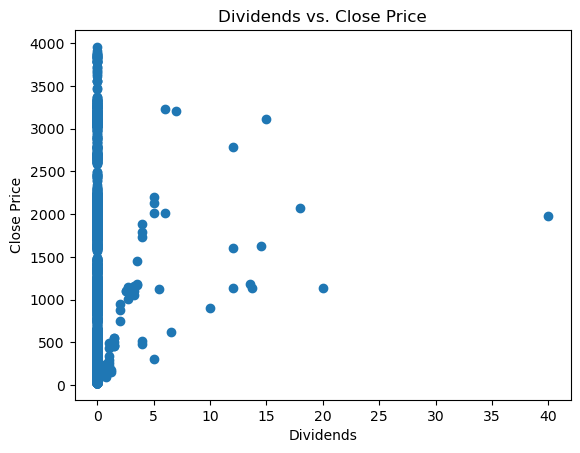

In [15]:
plt.scatter(data['Dividends'], data['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

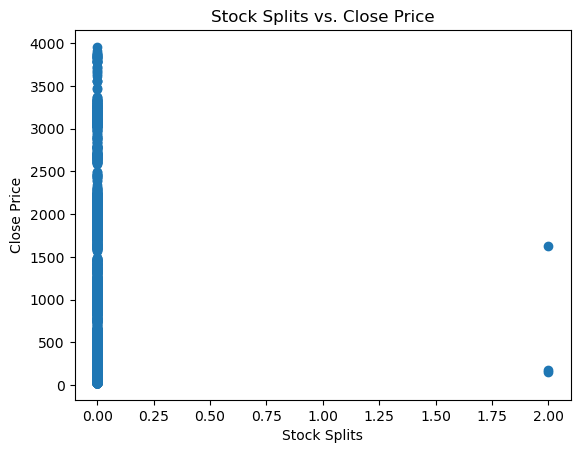

In [16]:
plt.scatter(data['Stock Splits'], data['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

In [17]:
data['Short_MA'] = data['Close'].rolling(window=5).mean()
data['Long_MA'] = data['Close'].rolling(window=30).mean()
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1,-1)

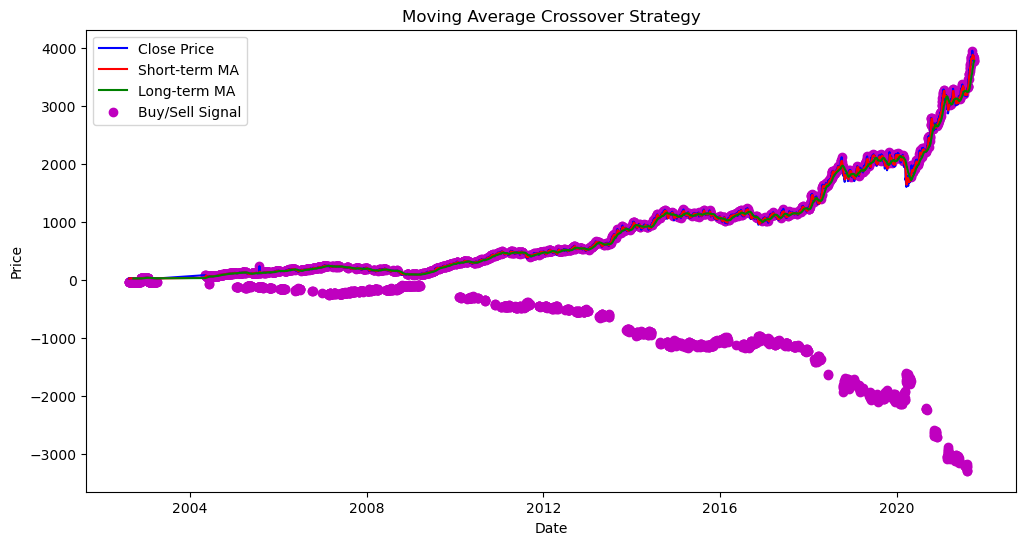

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price',color='b')
plt.plot(data['Date'], data['Short_MA'], label='Short-term MA',color='r')
plt.plot(data['Date'], data['Long_MA'], label='Long-term MA',color='g')
plt.scatter(data['Date'], data['Close'] * data['Signal'],
label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()


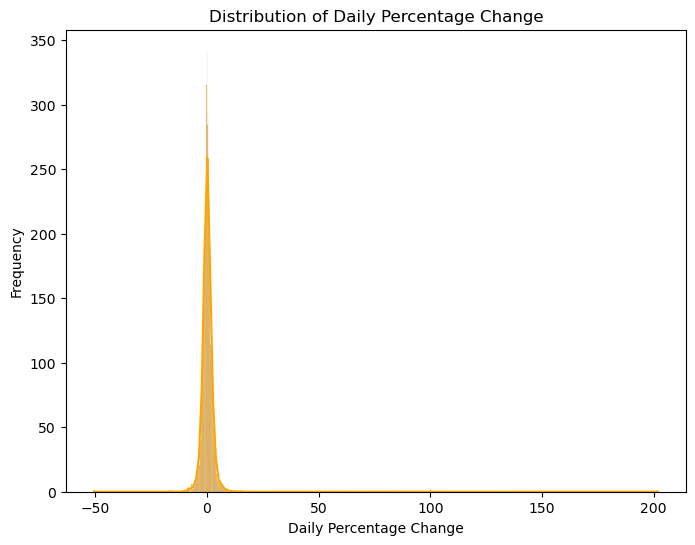

In [19]:
data['Daily_Price_Change'] = data['Close'].pct_change() * 100
plt.figure(figsize=(8, 6))
sns.histplot(data['Daily_Price_Change'].dropna(), kde=True,color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [20]:
data['Moving_avg_close']=data['Close'].rolling(window=7).mean()

In [21]:
data.shape

(4463, 15)

In [22]:
X_train = data['Close'].values.reshape(-1, 1)
y_train = data['Close'].shift(-1).dropna().values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

test_ratio = 0.2
test_size = int(len(data) * test_ratio)
test_data = data[-test_size:]

X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)


In [23]:
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error

model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Madhav\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
epochs=30
batch_size=15

In [26]:
for epoch in tqdm(range(epochs)):
    for i in range(0,len(X_train_lstm),batch_size):
        X_batch=X_train_lstm[i:i+batch_size]
        y_batch=y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch,y_batch)

X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [00:14<00:00,  2.09it/s]


In [27]:
lstm_predictions=model.predict(X_test_lstm).flatten()

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [28]:
lstm_predictions=lstm_predictions.reshape(-1,1)
lstm_predictions=scaler.inverse_transform(lstm_predictions)

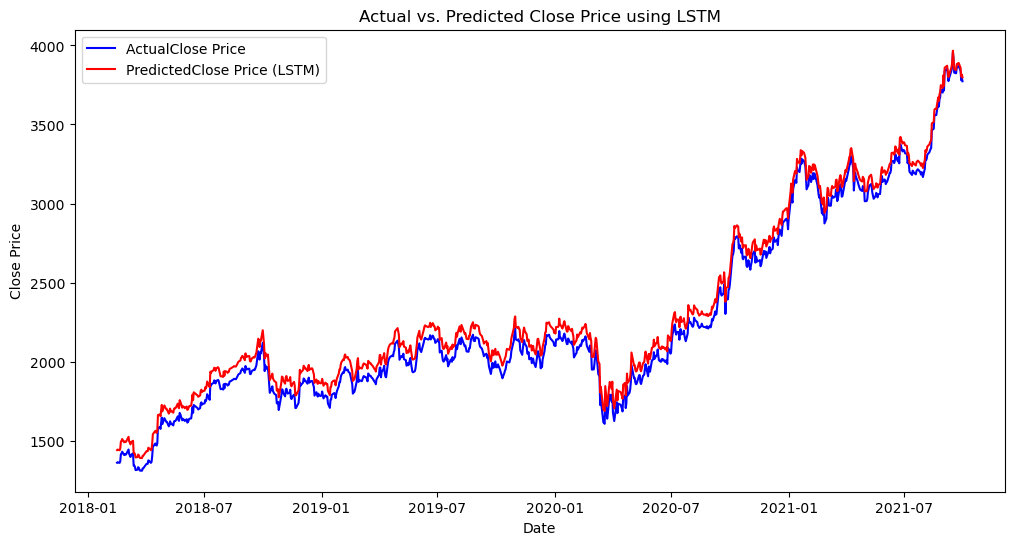

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='ActualClose Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='PredictedClose Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()


In [30]:
lstm_mae=mean_absolute_error(test_data['Close'],lstm_predictions)
print("LSTM Mean Absolur=te Error:", lstm_mae)

LSTM Mean Absolur=te Error: 73.19248982929864


In [31]:
lstm_predictions=lstm_predictions.reshape(-1,1)
lstm_predictions=scaler.inverse_transform(lstm_predictions)
date_index=test_data.index[-len(lstm_predictions):]
predictions_data=pd.DataFrame({'Date':date_index,'Predicted_Close':lstm_predictions.flatten()})

In [32]:
predictions_data.to_csv('predictions.csv',index=False)

In [33]:
final_result = pd.DataFrame({
    'Date': test_data['Date'].values,
    'Actual_Close': test_data['Close'].values,
    'Predicted_Close': lstm_predictions.flatten()
})

# Add error column
final_result['Error'] = final_result['Actual_Close'] - final_result['Predicted_Close']

final_result.to_csv("../Result/TCS_LSTM_Final_Result.csv", index=False)

print("Final result file created successfully!")

Final result file created successfully!
